In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np

In [3]:
import random

In [4]:
#prepare data
#f(x)= x**3 + x**2 - x - 1
X = tf.placeholder(tf.float32)
Y = X**3+X**2-X-1

train_x = list(np.arange(-100,100,0.1))
random.shuffle(train_x)

with tf.Session() as sess:
    #add noise
    train_y = sess.run(Y, {X:train_x})+np.random.normal(0,0.09)
    #print(train_x,train_y)

In [5]:
#some training args
nsteps = 300
#batch_size = 4
show_step = True
lr = 0.1

#num of units in hidden layer
h1 = 100
h2 = 200

In [6]:
def fc_layer(x, n_units, name):
    input_dim = x.get_shape()[1]
    #print out hidden layer shape
    print('input shape '+name+'= '+str(input_dim))
    w = tf.get_variable("W"+name, dtype=tf.float32, shape=[input_dim, n_units], initializer=tf.truncated_normal_initializer(stddev=0.01))
    b = tf.get_variable('b'+name, dtype=tf.float32, initializer=tf.constant(0., shape=[n_units], dtype=tf.float32))
    return tf.matmul(x,w)+b

    

In [7]:
def nnet(x,name):
    layer1 = fc_layer(x, h1, 'fc1'+str(name))
    layer1 = tf.nn.relu(layer1)
    layer2 = fc_layer(layer1, h2, 'fc2'+str(name))
    layer2 = tf.nn.relu(layer2)
    layerout = fc_layer(layer2, 1, 'fco'+str(name))
    return layerout

In [8]:
#input tensor
X = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='X')
y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='y')

#construct model
logits = nnet(X,'a')


input shape fc1a= 1
Instructions for updating:
Colocations handled automatically by placer.
input shape fc2a= 100
input shape fcoa= 200


In [9]:
loss_opt = tf.reduce_mean(tf.square(y-logits))
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
train = optimizer.minimize(loss_opt)

correct_predict = tf.equal(tf.argmax(logits,1), tf.argmax(y,1))

accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

In [10]:
def cut_batch(x,y,size,index):
    sub_x = []
    sub_y = []
    for i in range(size):
        cur = size*index+i
        if(cur < len(x)):
            sub_x.append(x[size*index+i])
            sub_y.append(y[size*index+i])
        else: break
        
    return sub_x, sub_y

In [11]:
import matplotlib.pyplot as plt

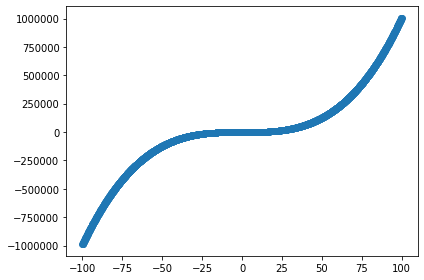

In [12]:
fig,ax = plt.subplots()
fig.set_tight_layout(True)
ax.scatter(train_x,train_y)

In [13]:
#train data input format config
train_x = np.array(train_x,float)[:,np.newaxis]
train_y = np.array(train_y,float)[:,np.newaxis]

In [14]:
predict_a = []

    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(nsteps):
        '''
        batch_x, batch_y = cut_batch(train_x, train_y, batch_size, i)
        batch_x = np.array(batch_x,float)[:,np.newaxis]
        for j in range(len(batch_y)):
            #add noise
            batch_y[j]+=np.random.normal(0,0.09)
        batch_y = np.array(batch_y,float)[:,np.newaxis]
        '''
        
        
        _,loss,acc = sess.run([train,loss_opt,accuracy],{X:train_x, y:train_y})
        
        if(show_step):
            print("Step " + str(i+1) + " , Loss= " + str(loss))
        
    print("Train Finished")
    
    predict_a = sess.run(logits,{X:train_x})
    

Step 1 , Loss= 142827670000.0
Step 2 , Loss= 142827600000.0
Step 3 , Loss= 142714450000.0
Step 4 , Loss= 142359500000.0
Step 5 , Loss= 141566350000.0
Step 6 , Loss= 140100490000.0
Step 7 , Loss= 137649500000.0
Step 8 , Loss= 133849590000.0
Step 9 , Loss= 128363676000.0
Step 10 , Loss= 120849710000.0
Step 11 , Loss= 111115440000.0
Step 12 , Loss= 99118590000.0
Step 13 , Loss= 85165690000.0
Step 14 , Loss= 70125570000.0
Step 15 , Loss= 55754777000.0
Step 16 , Loss= 45018972000.0
Step 17 , Loss= 41289820000.0
Step 18 , Loss= 42455560000.0
Step 19 , Loss= 40391328000.0
Step 20 , Loss= 34722990000.0
Step 21 , Loss= 29997853000.0
Step 22 , Loss= 29316670000.0
Step 23 , Loss= 31709546000.0
Step 24 , Loss= 34045397000.0
Step 25 , Loss= 34661640000.0
Step 26 , Loss= 33656433000.0
Step 27 , Loss= 31795696000.0
Step 28 , Loss= 29818104000.0
Step 29 , Loss= 28163369000.0
Step 30 , Loss= 26964412000.0
Step 31 , Loss= 26180751000.0
Step 32 , Loss= 25750477000.0
Step 33 , Loss= 25667210000.0
Step 34 

Step 295 , Loss= 562498700.0
Step 296 , Loss= 548247900.0
Step 297 , Loss= 554342300.0
Step 298 , Loss= 572850800.0
Step 299 , Loss= 585367800.0
Step 300 , Loss= 608849860.0
Train Finished


hidden layer 1: 100
hidden layer 2: 200


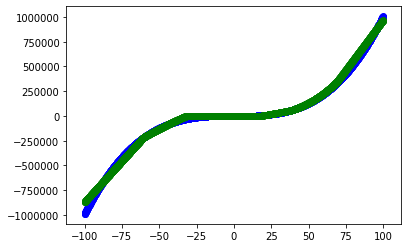

In [15]:
#plot result
print("hidden layer 1: "+str(h1)+"\nhidden layer 2: "+str(h2))
plt.scatter(train_x,train_y,color='blue')
plt.scatter(train_x,predict_a, color='green')
plt.show()

In [16]:
#num of units in hidden layer
h1 = 45
h2 = 100

#construct model
logits = nnet(X,'b')

input shape fc1b= 1
input shape fc2b= 45
input shape fcob= 100


In [17]:
loss_opt = tf.reduce_mean(tf.square(y-logits))
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
train = optimizer.minimize(loss_opt)

correct_predict = tf.equal(tf.argmax(logits,1), tf.argmax(y,1))

accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

In [18]:
predict_b = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(nsteps):
        '''
        batch_x, batch_y = cut_batch(train_x, train_y, batch_size, i)
        batch_x = np.array(batch_x,float)[:,np.newaxis]
        for j in range(len(batch_y)):
            #add noise
            batch_y[j]+=np.random.normal(0,0.09)
        batch_y = np.array(batch_y,float)[:,np.newaxis]
        '''
        
        
        _,loss,acc = sess.run([train,loss_opt,accuracy],{X:train_x, y:train_y})
        
        if(show_step):
            print("Step " + str(i+1) + " , Loss= " + str(loss))
        
    print("Train Finished")
    
    predict_b = sess.run(logits,{X:train_x})
    

Step 1 , Loss= 142827650000.0
Step 2 , Loss= 142826600000.0
Step 3 , Loss= 142773520000.0
Step 4 , Loss= 142658670000.0
Step 5 , Loss= 142401730000.0
Step 6 , Loss= 141936480000.0
Step 7 , Loss= 141165150000.0
Step 8 , Loss= 139983470000.0
Step 9 , Loss= 138274550000.0
Step 10 , Loss= 135913325000.0
Step 11 , Loss= 132779280000.0
Step 12 , Loss= 128724525000.0
Step 13 , Loss= 123623880000.0
Step 14 , Loss= 117404950000.0
Step 15 , Loss= 109994390000.0
Step 16 , Loss= 101389480000.0
Step 17 , Loss= 91717850000.0
Step 18 , Loss= 81058710000.0
Step 19 , Loss= 69909760000.0
Step 20 , Loss= 58837897000.0
Step 21 , Loss= 48677515000.0
Step 22 , Loss= 40522666000.0
Step 23 , Loss= 35368680000.0
Step 24 , Loss= 33306020000.0
Step 25 , Loss= 32967655000.0
Step 26 , Loss= 32751153000.0
Step 27 , Loss= 32713845000.0
Step 28 , Loss= 33359077000.0
Step 29 , Loss= 34191770000.0
Step 30 , Loss= 34112422000.0
Step 31 , Loss= 32806806000.0
Step 32 , Loss= 30785724000.0
Step 33 , Loss= 28735212000.0
Ste

hidden layer 1: 45
hidden layer 2: 100


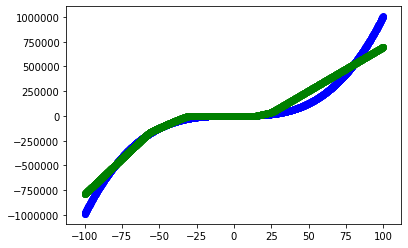

In [19]:
#plot result
print("hidden layer 1: "+str(h1)+"\nhidden layer 2: "+str(h2))
plt.scatter(train_x,train_y,color='blue')
plt.scatter(train_x,predict_b, color='green')
plt.show()

In [20]:
#num of units in hidden layer
h1 = 10
h2 = 30

#construct model
logits = nnet(X,'c')

input shape fc1c= 1
input shape fc2c= 10
input shape fcoc= 30


In [21]:
loss_opt = tf.reduce_mean(tf.square(y-logits))
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
train = optimizer.minimize(loss_opt)

correct_predict = tf.equal(tf.argmax(logits,1), tf.argmax(y,1))

accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

In [22]:
predict_c = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(nsteps):
        '''
        batch_x, batch_y = cut_batch(train_x, train_y, batch_size, i)
        batch_x = np.array(batch_x,float)[:,np.newaxis]
        for j in range(len(batch_y)):
            #add noise
            batch_y[j]+=np.random.normal(0,0.09)
        batch_y = np.array(batch_y,float)[:,np.newaxis]
        '''
        
        
        _,loss,acc = sess.run([train,loss_opt,accuracy],{X:train_x, y:train_y})
        
        if(show_step):
            print("Step " + str(i+1) + " , Loss= " + str(loss))
        
    print("Train Finished")
    
    predict_c = sess.run(logits,{X:train_x})
    

Step 1 , Loss= 142827650000.0
Step 2 , Loss= 142827730000.0
Step 3 , Loss= 142825820000.0
Step 4 , Loss= 142819970000.0
Step 5 , Loss= 142804470000.0
Step 6 , Loss= 142773830000.0
Step 7 , Loss= 142721600000.0
Step 8 , Loss= 142640120000.0
Step 9 , Loss= 142520680000.0
Step 10 , Loss= 142353580000.0
Step 11 , Loss= 142127940000.0
Step 12 , Loss= 141831880000.0
Step 13 , Loss= 141452410000.0
Step 14 , Loss= 140975440000.0
Step 15 , Loss= 140385860000.0
Step 16 , Loss= 139667500000.0
Step 17 , Loss= 138809880000.0
Step 18 , Loss= 137775350000.0
Step 19 , Loss= 136565080000.0
Step 20 , Loss= 135153476000.0
Step 21 , Loss= 133522160000.0
Step 22 , Loss= 131649140000.0
Step 23 , Loss= 129518430000.0
Step 24 , Loss= 127111200000.0
Step 25 , Loss= 124411040000.0
Step 26 , Loss= 121403570000.0
Step 27 , Loss= 118077240000.0
Step 28 , Loss= 114424185000.0
Step 29 , Loss= 110441190000.0
Step 30 , Loss= 106130840000.0
Step 31 , Loss= 101502770000.0
Step 32 , Loss= 96575020000.0
Step 33 , Loss= 91

hidden layer 1: 10
hidden layer 2: 30


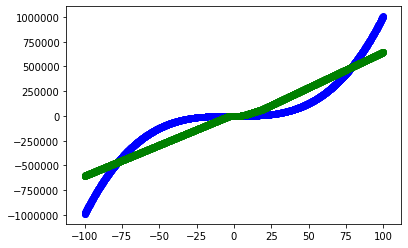

In [23]:
#plot result
print("hidden layer 1: "+str(h1)+"\nhidden layer 2: "+str(h2))
plt.scatter(train_x,train_y,color='blue')
plt.scatter(train_x,predict_c, color='green')
plt.show()

HW4 Part 1 comparsion
hidden layer 1: 10
hidden layer 2: 30
green

hidden layer 1: 45
hidden layer 2: 100
yellow

hidden layer 1: 100
hidden layer 2: 200
red



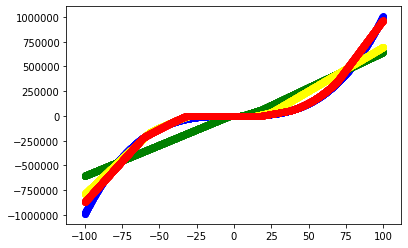

In [29]:
print("HW4 Part 1 comparsion")
print("hidden layer 1: 10\nhidden layer 2: 30\ngreen\n")
print("hidden layer 1: 45\nhidden layer 2: 100\nyellow\n")
print("hidden layer 1: 100\nhidden layer 2: 200\nred\n")
plt.scatter(train_x,train_y,color='blue')
plt.scatter(train_x,predict_c,color='green')
plt.scatter(train_x,predict_b,color='yellow')
plt.scatter(train_x,predict_a,color='red')